In [106]:
#Importação de bibliotecas utilizadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Abertura da base de dados com a extensão .xlsx

data = pd.read_excel('data/bd_surveyquaest.xlsx')
data

,sbjnum,sexo,idade,rendaf,esc,aval_gov,voto1
0,136037235,Masculino,57,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Regular positiva,Candidato 2
1,136037575,Masculino,32,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Boa,Ninguém/Branco/Nulo
2,136038074,Masculino,70,"De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10...",Ensino médio completo,Boa,Candidato 2
3,136041069,Masculino,50,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino fundamental incompleto,Ótima,Candidato 2
4,136041107,Masculino,24,"De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)",Ensino superior incompleto,Boa,Candidato 2
...,...,...,...,...,...,...,...
995,136140712,Feminino,20,"De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10...",Ensino médio completo,Boa,Candidato 2
996,136140811,Feminino,18,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio incompleto,Ótima,Candidato 14
997,136140955,Feminino,22,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Regular positiva,Ninguém/Branco/Nulo
998,136141043,Feminino,45,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino superior incompleto,Ótima,Candidato 2


In [4]:
#descrição das colunas da base de dados


#sbjnum: id do respondente
#sexo: sexo do respondente
#idade: idade (numérica) do respondente
#rendaf: renda familiar do respondente
#esc: escolaridade do respondente
#aval_gov: avaliação do governo
#voto1: intenção de voto do respondente.

# Primeira Questão - Qual o % de intenção de voto para cada candidato?

### Resposta: 

##### Utilizando o data['voto1'].value_counts() é possível ver os valores únicos que este atributo pode assumir e suas respectivas quantidades.
##### É possível ver a existência de 14 candidatos e dividindo suas respectivas intenções pela quantidade total de registros, temos:
##### Candidato 1 = 42/ 1000 = 0,042% = 4.2%
##### Candidato 2 = 523/ 1000 = 0,523% = 52.3%
##### Candidato 3 = 16/ 1000 = 0,016% = 1.6%
##### Candidato 4 = 12/ 1000 = 0,012% = 1.2%
##### Candidato 5 = 25/ 1000 = 0,025% = 2.5%
##### Candidato 6 = 10/ 1000 = 0,010% =  1.0%
##### Candidato 7 = 7/ 1000 = 0,007% = 0.7%
##### Candidato 8 = 26/ 1000 = 0,026% = 2.6%
##### Candidato 9 = 19/ 1000 = 0,019% = 1.9%
##### Candidato 10 = 20/ 1000 = 0,020% = 2.0%
##### Candidato 11 = 3/ 1000 = 0,003% = 0.3%
##### Candidato 12 = 6/ 1000 = 0,006% = 0.6%
##### Candidato 13 = 3/ 1000 = 0,003% = 0.3%
##### Candidato 14 = 6/ 1000 = 0,006% = 0.6%

In [5]:
#A coluna correspondente a intenção de voto é data['voto1']
#Praticamente mais de 50% dos eleitores possuem a intenção de votar no Candidato 2.
#71.8% das pessoas que responderam o survey possuem intenção de voto em algum dos candidatos


data['voto1'].value_counts()

Candidato 2            523
Ninguém/Branco/Nulo    142
NS/NR                  140
Candidato 1             42
Candidato 8             26
Candidato 5             25
Candidato 10            20
Candidato 9             19
Candidato 3             16
Candidato 4             12
Candidato 6             10
Candidato 7              7
Candidato 12             6
Candidato 14             6
Candidato 13             3
Candidato 11             3
Name: voto1, dtype: int64

In [32]:
#Pegando os índices que não correspondem a intenção de voto em nenhum dos candidatos para poder excluir e sobrar
#apenas as intenções em candidatos e assim criar um gráfico entre eles

indexNames = data[(data['voto1'] == 'NS/NR') | (data['voto1'] == 'Ninguém/Branco/Nulo')].index

#exclusão

data1 = data.drop(indexNames, axis=0)

#### Neste próximo gráfico, com dimensão em porcentagem, fica extremamente a diferença de votos entre o Candidato 2 e os demais

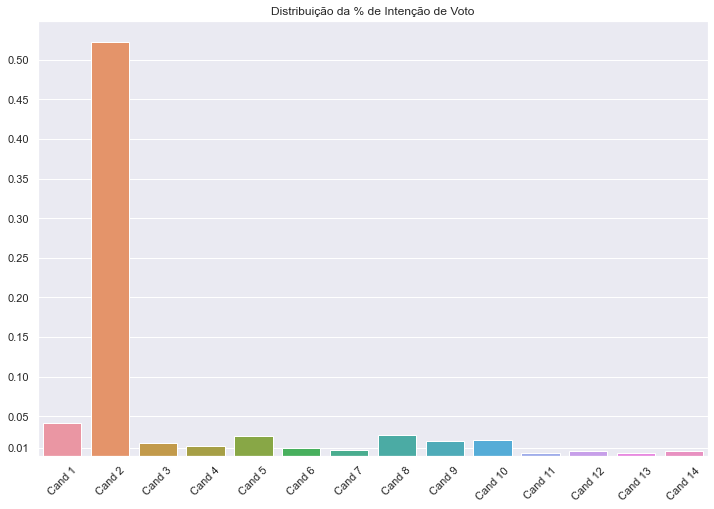

In [118]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize =(12, 8))
g = sns.barplot(x=["Candidato 1", "Candidato 2", "Candidato 3", "Candidato 4", "Candidato 5", 
                   "Candidato 6", "Candidato 7", "Candidato 8", "Candidato 9", "Candidato 10", 
                   "Candidato 11", "Candidato 12","Candidato 13","Candidato 14"],
                y=[(42/1000), (523/1000), (16/1000), (12/1000), (25/1000), 
                   (10/1000), (7/1000), (26/1000), (19/1000), (20/1000),
                   (3/1000), (6/1000), (3/1000), (6/1000)])

g.set_xticklabels(labels=["Cand 1", "Cand 2", "Cand 3", "Cand 4", "Cand 5", 
                          "Cand 6", "Cand 7", "Cand 8", "Cand 9", "Cand 10", 
                          "Cand 11", "Cand 12","Cand 13","Cand 14"], rotation=45)
ax.set_yticks((0.01, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5))
ax.set_title("Distribuição da % de Intenção de Voto")
# Show the plot
plt.show()

# Questão 2 - Qual o candidato com maior % de intenção de voto entre as MULHERES?

### Resposta:

##### O Candidato 2 possui a maior porcentagem de intenção de votos entre as mulheres, o que corresponde a mais de 54% da intenção dos votos delas

In [6]:
#Valores únicos e sua contagem. Sabendo esses valores, é possível criar um gráfico de pizza para visualizar melhor

data['sexo'].value_counts()

Feminino     545
Masculino    455
Name: sexo, dtype: int64

### Gráfico 1: Distribuição de Gêneros

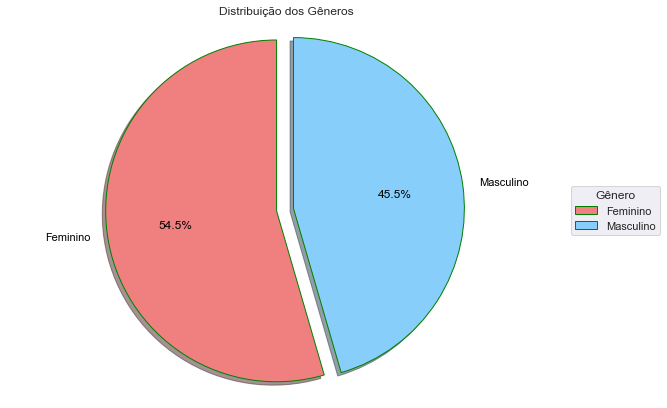

In [76]:
#Gráfico de Pizza com distribuição do Sexo

# Dados obtidos anteriormente sendo definidos
labels = ["Feminino", "Masculino"]
sizes = [545, 455]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Propriedades das fatias
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(sizes, 
                                  autopct ='%1.1f%%' ,
                                  explode = explode, 
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, labels,
          title ="Gênero",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title('Distribuição dos Gêneros')
plt.axis('equal')
plt.show()


In [43]:
#Pegando os índices o qual a coluna sexo esteja classificado como Masculino para poder excluir

indexNamesWoman = data[(data['sexo'] == 'Masculino')].index
indexNamesWoman

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            445, 446, 447, 448, 449, 450, 451, 452, 453, 454],
           dtype='int64', length=455)

In [44]:
#exclusão

data2 = data.drop(indexNamesWoman, axis=0)
data2

,sbjnum,sexo,idade,rendaf,esc,aval_gov,voto1
455,136038515,Feminino,64,"De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)",Ensino superior completo,Ruim,NS/NR
456,136040271,Feminino,58,"De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)",Ensino médio completo,Péssima,Candidato 5
457,136041110,Feminino,75,"Até R$ 1.045,00 (até 1 SM)",Ensino fundamental incompleto,Regular positiva,NS/NR
458,136041112,Feminino,32,"Até R$ 1.045,00 (até 1 SM)",Ensino superior completo,Boa,Ninguém/Branco/Nulo
459,136041113,Feminino,55,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Boa,Candidato 2
...,...,...,...,...,...,...,...
995,136140712,Feminino,20,"De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10...",Ensino médio completo,Boa,Candidato 2
996,136140811,Feminino,18,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio incompleto,Ótima,Candidato 14
997,136140955,Feminino,22,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Regular positiva,Ninguém/Branco/Nulo
998,136141043,Feminino,45,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino superior incompleto,Ótima,Candidato 2


In [46]:
#Sobrou APENAS os dados com mulheres nessa variável

data2['sexo'].value_counts()

Feminino    545
Name: sexo, dtype: int64

In [51]:
#Como já foi feito a separação e dentro da variável data2 só existem registros de MULHERES, então é possível só fazer um plot normal
#dos dados de data2 de acordo com a coluna de 'voto1'.

data2['voto1'].value_counts()

Candidato 2            295
NS/NR                   83
Ninguém/Branco/Nulo     72
Candidato 5             14
Candidato 8             14
Candidato 10            14
Candidato 1             11
Candidato 3              9
Candidato 6              7
Candidato 9              7
Candidato 14             6
Candidato 4              4
Candidato 12             3
Candidato 7              3
Candidato 13             2
Candidato 11             1
Name: voto1, dtype: int64

In [8]:
#Apenas 11 das mulheres que responderam votaram no candidato 1

((data['sexo'] == 'Feminino') & (data['voto1'] == 'Candidato 1')).value_counts()

False    989
True      11
dtype: int64

In [9]:
#Apenas 295 das mulheres que responderam votaram no candidato 2
#Mais de 54% das mulheres votaram no candidato 2

((data['sexo'] == 'Feminino') & (data['voto1'] == 'Candidato 2')).value_counts()

False    705
True     295
dtype: int64

In [ ]:
#Gráfico 2

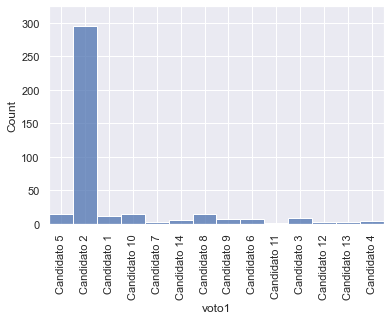

In [105]:
#tema dark do seaborn
indexNamesW = data2[(data2['voto1'] == 'NS/NR') | (data2['voto1'] == 'Ninguém/Branco/Nulo')].index

#exclusão

data2 = data2.drop(indexNamesW, axis=0)
sns.set(style="darkgrid")


plt.margins(0, 0.1)
sns.histplot(data=data2, x="voto1", bins=14)
plt.xticks(rotation=90) #Rotacionando os labels para não ficar um em cima do outro
plt.show()

# Questão 3 - O candidato que lidera as intenções de voto é o candidato de situação ou oposição ao governo ?



### Resposta:
#### Considerando apenas as 523 pessoas que tem intenção de votar no Candidato 2 (é ele quem lidera), é perceptível que a avaliação que elas fizeram ao governo é extremamente positiva, visto que mais de 86% deles disseram que é boa/ótima. Dessa forma, se eles avaliaram bem o governo e a intenção deles é realizar o voto no Candidato 2, então é muito provável que o mesmo seja o candidato de situação!

In [10]:
#Avaliação GERAL ao governo

data['aval_gov'].value_counts()

Boa                 443
Ótima               181
Regular positiva    175
Regular negativa     74
Péssima              64
Ruim                 49
NS/NR                14
Name: aval_gov, dtype: int64

In [12]:
#Avaliação ao governo APENAS daqueles que votaram no candidato 2
#Boa, ótima e Regular Posivita formam quase a totalidade, portanto, feedback muito positivo.

data[data['voto1'] == 'Candidato 2']['aval_gov'].value_counts()

Boa                 300
Ótima               154
Regular positiva     59
Regular negativa      7
Péssima               1
Ruim                  1
NS/NR                 1
Name: aval_gov, dtype: int64

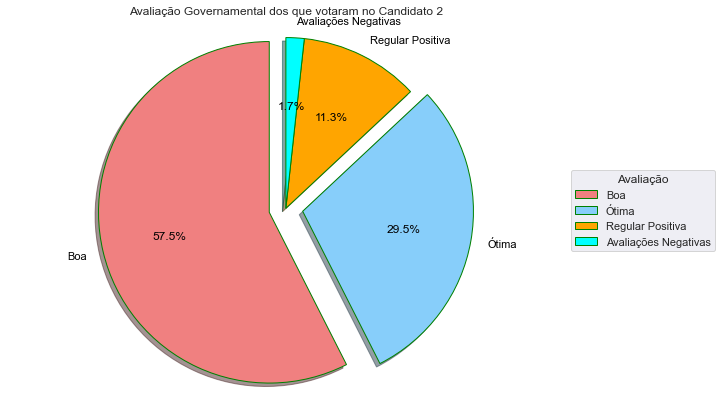

In [116]:
#Separar os que votaram no Candidato 2

#Gráfico de Pizza com distribuição do Sexo

# Dados obtidos anteriormente sendo definidos
labels = ['Boa', 'Ótima', 'Regular Positiva', 'Avaliações Negativas']
sizes = [300,154,59, 9]
colors = ['lightcoral', 'lightskyblue', "orange", "cyan"]
explode = (0.1, 0.1,0,0)  # explode 1st slice

# Propriedades das fatias
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(sizes, 
                                  autopct ='%1.1f%%' ,
                                  explode = explode, 
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, labels,
          title ="Avaliação",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title('Avaliação Governamental dos que votaram no Candidato 2')
plt.axis('equal')
plt.show()